# 0 Test New Loader

## Summary
Load datasets, provide summary information, and store to relevant target directory.

## Changes
- 02/17/2020: v0.1 Mitchell Abrams

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [138]:
%%time
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import missingno as msno

from pathlib import Path
import json

import plotly.express as px

from dask.distributed import Client

#from src.data.load_data import *
#from src.data.load_data_new import convert_all_hdf5
from src.decoders import extra_info as ei
from src.decoders import builder
from src.data.data_loader_pooch import load_pipeline

pd.set_option('precision', 3)
pd.set_option('display.max_columns', 999)

CPU times: user 26 ms, sys: 82.8 ms, total: 109 ms
Wall time: 186 ms


In [4]:
client = Client()
client

Client Scheduler: tcp://127.0.0.1:49188 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 16 Memory: 34.36 GB


In [10]:
vehicles, accidents, people = load_pipeline(1975, 2018, use_dask=True, client=client)

Loading mappings...
Mappings loaded.
Loading data...
1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 
Data loaded.
Processing Accidents.
Processing Vehicles.
Processing People.
Done


In [106]:
vehicles, accidents, people = load_pipeline(1975, 2018, use_dask=False)

Loading mappings...
Mappings loaded.
Loading data...
1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 
Data loaded.
Processing Accidents.
Processing Vehicles.
Processing People.
Done


In [108]:
for x in accidents['CF1'].value_counts().index:
    print(x)

None
Motor Vehicle struck by falling cargo,or something that came loose from or something that was set in motion by a vehicle
Unknown
Swerving due to slippery surface
Police Pursuit Involved
Recent/Previous accident scene nearby
Vision obscured by weather conditions
Vision obscured by curve, hill, or other design features (including traffic signs, embankments)
Speed Limit is a Statutory Limit as Recorded or was determined as this state's 'basic rule'
Date of Accident and Date of EMS Notification were not the same day
No or obscured pavement markings
Swerving due to avoiding vehicle in road
Other construction
Indication of a Stalled/Disabled Vehicle
Non-occupant struck vehicle
Vision obscured by reflected glare, bright sunlight, headlights
Shoulder related
Vision obscured by parked vehicle
Vision obscured by moving vehicle (including load)
Swerving due to avoiding pedestrian, pedalcyclist, other non-motorist in road
Non-occupant struck by falling cargo, or something that came loose from

In [109]:
accidents.loc[accidents['CF1'].isin([])]['YEAR'].value_counts()

1978    18
Name: YEAR, dtype: int64

In [126]:
for x in accidents.dtypes:
    print(x)

object
int64
int64
int64
int64
int64
int64
int64
float64
object
object
object
object
object
object
object
object
object
object
float64
float64
object
object
object
object
object
object
object
object
object
int64
int64
int64
int64
float64
object
object
object
int64
object
int64
int64
object
object
object
object
float64
object
float64
float64
float64
object
object
float64
object
object
object
object
float64
float64
float64
object
object
object
object
object
object
object
object
object
object
object
float64
float64


In [142]:
from src.data.data_loader_pooch import save_pkl
save_pkl('test', people, vehicles, accidents)

In [136]:
msno.matrix(people, labels=True)

KeyboardInterrupt: 

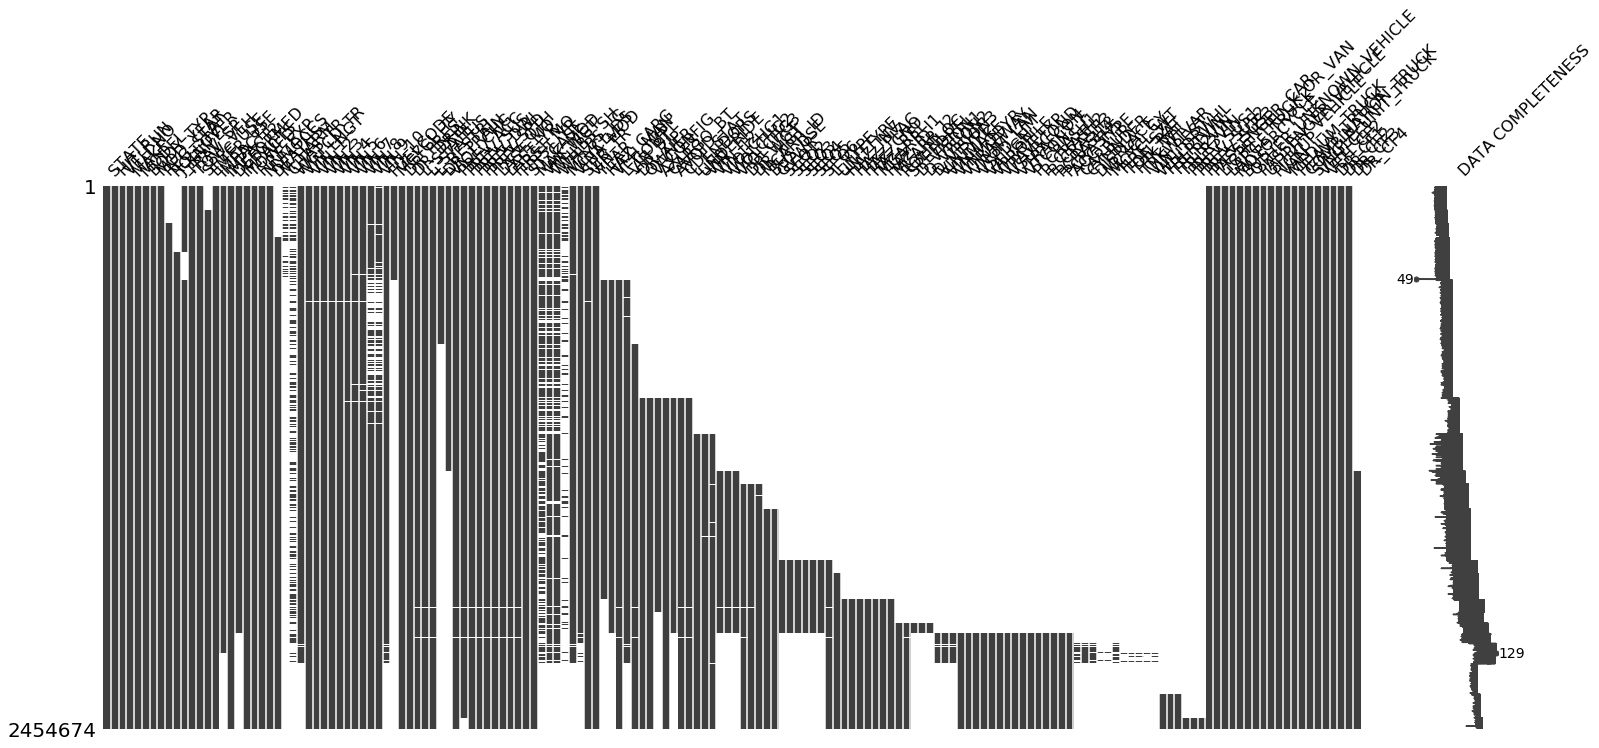

In [6]:
msno.matrix(vehicles, labels=True)

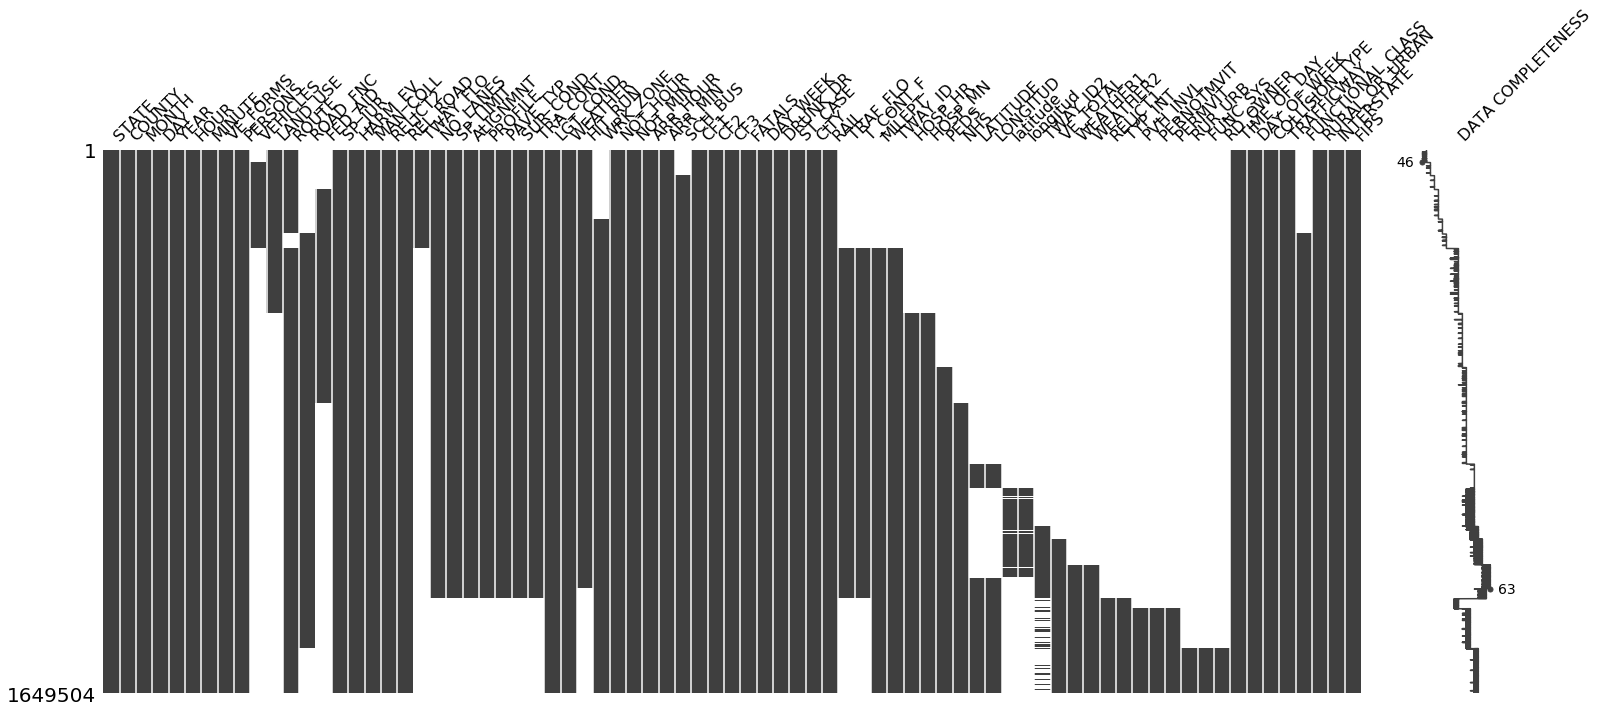

In [7]:
msno.matrix(accidents, labels=True)

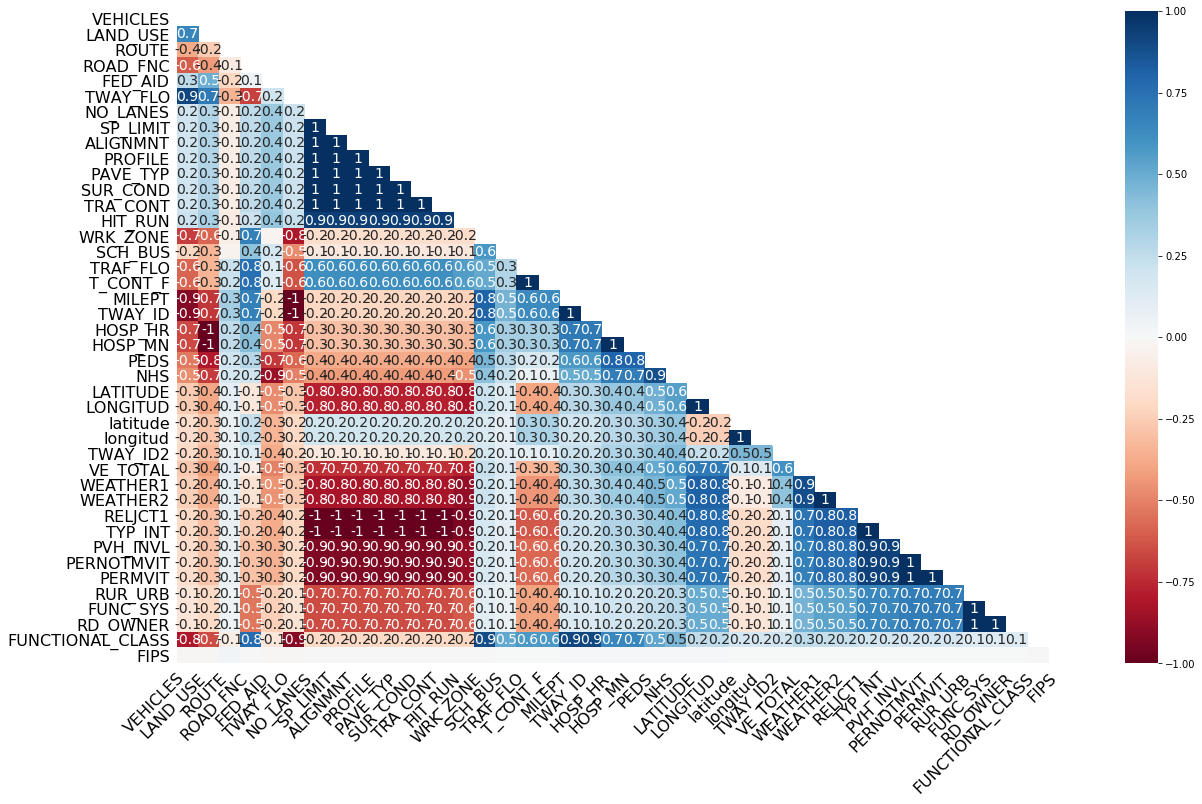

In [8]:
msno.heatmap(accidents)

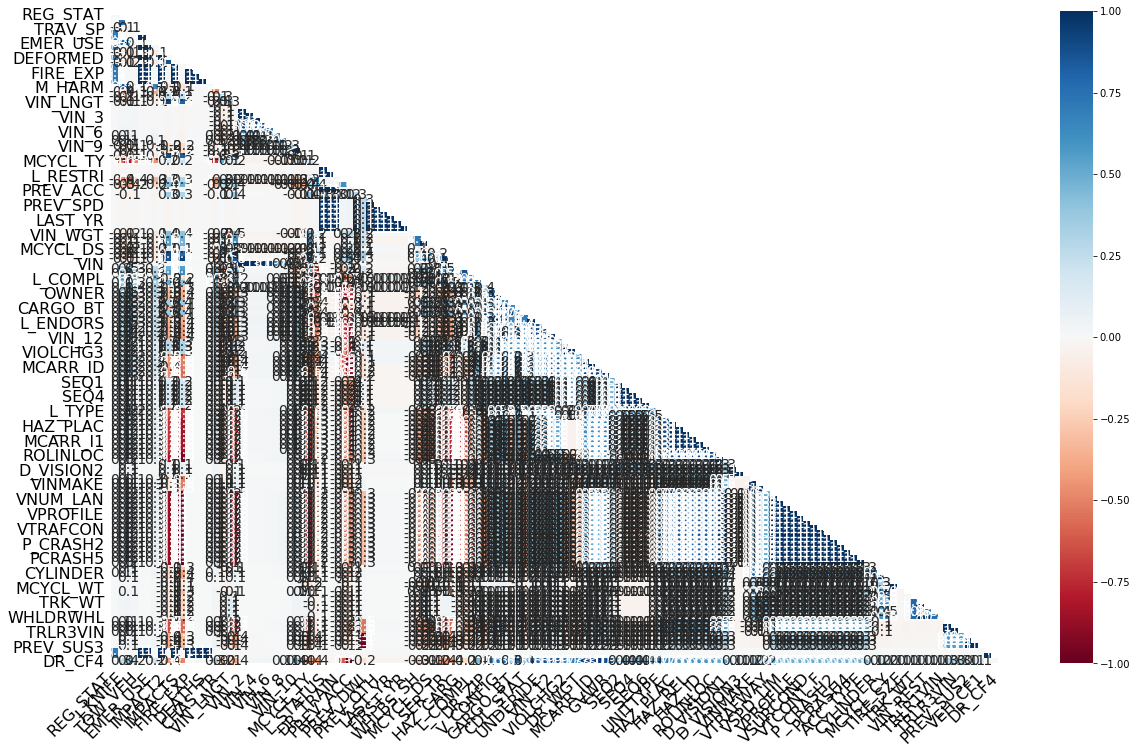

In [9]:
msno.heatmap(vehicles)

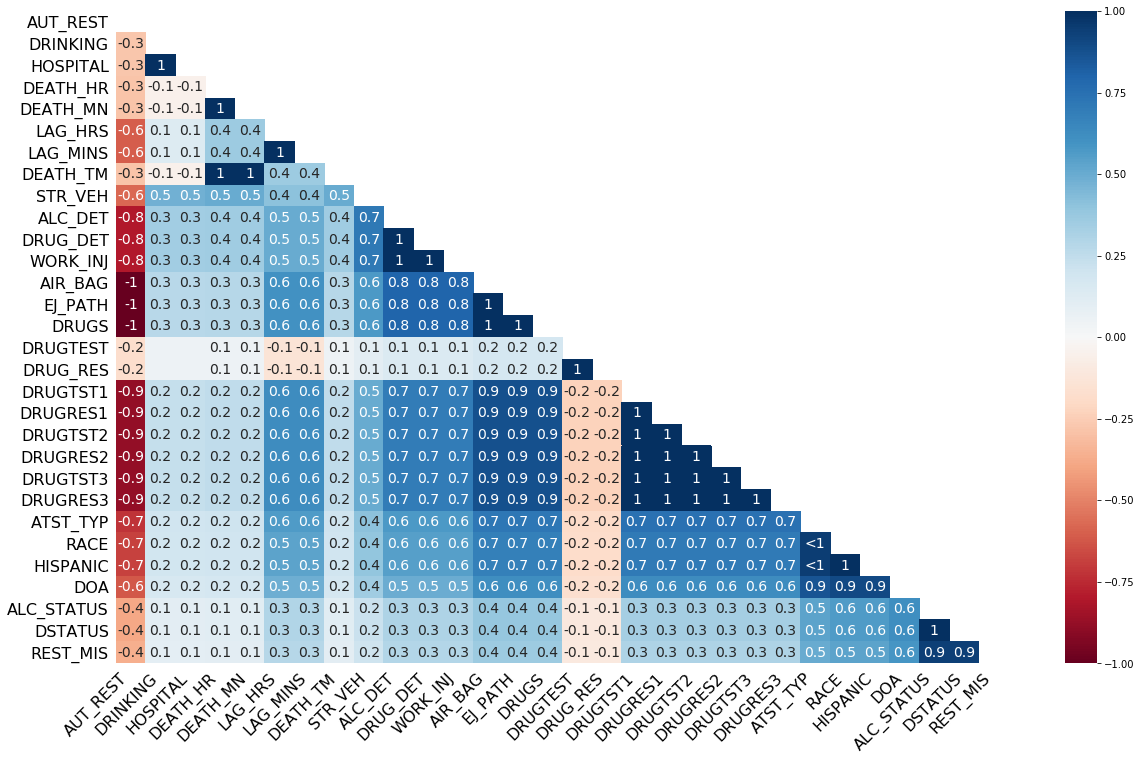

In [10]:
msno.heatmap(people)

In [16]:
for x in sorted(vehicles.columns):
    print(x)

ACC_TYPE
AVOID
AXLES
BODY_TYP
BUS
BUS_USE
CARBUR
CARGO_BT
CDL_STAT
CHAS_TR
COMBINATION_TRUCK
CYLINDER
DEATHS
DEFORMED
DISPLACE
DR_CF1
DR_CF2
DR_CF3
DR_CF4
DR_DRINK
DR_HGT
DR_PRES
DR_TRAIN
DR_WGT
DR_ZIP
D_VISION1
D_VISION2
D_VISION3
EMER_USE
FIRE_EXP
FIRST_MO
FIRST_YR
FUELCODE
GVWR
HAZ_CARG
HAZ_CNO
HAZ_ID
HAZ_INV
HAZ_PLAC
HAZ_REL
HEAVY_TRUCK
HIT_RUN
IMPACT1
IMPACT2
IMPACTS
J_KNIFE
LARGE_TRUCK
LAST_MO
LAST_YR
LIGHT_TRUCK_OR_VAN
L_COMPL
L_ENDORS
L_RESTRI
L_STATE
L_STATUS
L_TYPE
MAKE
MAK_MOD
MCARR_I1
MCARR_I2
MCARR_ID
MCYCL_CY
MCYCL_DS
MCYCL_TY
MCYCL_WT
MEDIUM_TRUCK
MODEL
MOD_YEAR
MOTORCYCLE
M_HARM
NUMOCCS
OTHER_UNKNOWN_VEHICLE
OWNER
PASSENGER_CAR
PASSENGER_VEHICLE
PCRASH4
PCRASH5
PICKUP
PREV_ACC
PREV_DWI
PREV_OTH
PREV_SPD
PREV_SUS
PREV_SUS1
PREV_SUS2
PREV_SUS3
P_CRASH1
P_CRASH2
P_CRASH3
REG_STAT
ROLINLOC
ROLLOVER
SEQ1
SEQ2
SEQ3
SEQ4
SEQ5
SEQ6
SER_TR
SINGLE_UNIT_TRUCK
SPEC_USE
SPEEDREL
STATE
ST_CASE
TIRE_SZE
TON_RAT
TOWED
TOW_VEH
TRAV_SP
TRKWTVAR
TRK_WT
TRLR1VIN
TRLR2VIN
TRLR3VIN
UNDERIDE
